In [166]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn.metrics import mutual_info_score
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score  
from sklearn.metrics import auc 
from sklearn.model_selection import KFold
from tqdm import tqdm
import pickle

In [167]:
# Load the dataset

df = pd.read_csv('data/base_blockchain.csv')
df

,wallet,tx_count_365d,total_volume,active_weeks,avg_tx_value,tx_per_active_week,trader_activity_status,trader_volume_status,trader_consistency_status,future_tx_count,target_variable
0,0xcaa62b4ab5386f23e756b97b6662bd1f9f01ee76,1,1.400476e-01,1,0.140048,1.000000,Occasional User,Medium Value,Inconsistent,0,Bad Trader
1,0x433dd3a9a7b5d87a90f6541ee7900c55b03a7235,2,3.159048e-03,1,0.001580,2.000000,Occasional User,Low Value,Inconsistent,0,Bad Trader
2,0xc17a98d6ccd01c16780d71b9f2b43200fc14baa5,3,9.020064e-03,1,0.003007,3.000000,Regular User,Medium Value,Inconsistent,0,Bad Trader
3,0x1880a2b761d8df5b61803a71e856f510e705ffe7,22,6.156545e+02,5,27.984295,4.400000,Frequent User,Medium Value,Consistent,18,Good Trader
4,0x5ade9eaa274d8de0b5af96ba99a4073f50c317cd,134,1.068579e+03,9,7.974469,14.888889,Frequent User,Medium Value,Consistent,13,Good Trader
...,...,...,...,...,...,...,...,...,...,...,...
4995,0x77c5da94139551dc17f60660bdfd9972d1938b9d,3,5.030952e-03,1,0.001677,3.000000,Regular User,Low Value,Inconsistent,0,Bad Trader
4996,0x1d8bb1ddadcfb75377ac505d8a0b88876f131a9a,3,5.014541e-03,1,0.001672,3.000000,Regular User,Low Value,Inconsistent,0,Bad Trader
4997,0x21d10909b548248d443cd11799a97e52cd26fa00,2284,3.987060e+06,44,1745.648085,51.909091,Frequent User,High Value,Consistent,14,Good Trader
4998,0x1e65803dd7eb47c0ca229f7b862fb8fe94ac4f48,7,2.974512e+00,5,0.424930,1.400000,Regular User,Medium Value,Consistent,0,Bad Trader


In [168]:

df['target_variable'] = (
    df['target_variable']
    .str.strip()
    .str.lower()
    .map({'good trader': 1, 'bad trader': 0})
)

In [169]:
df

,wallet,tx_count_365d,total_volume,active_weeks,avg_tx_value,tx_per_active_week,trader_activity_status,trader_volume_status,trader_consistency_status,future_tx_count,target_variable
0,0xcaa62b4ab5386f23e756b97b6662bd1f9f01ee76,1,1.400476e-01,1,0.140048,1.000000,Occasional User,Medium Value,Inconsistent,0,0
1,0x433dd3a9a7b5d87a90f6541ee7900c55b03a7235,2,3.159048e-03,1,0.001580,2.000000,Occasional User,Low Value,Inconsistent,0,0
2,0xc17a98d6ccd01c16780d71b9f2b43200fc14baa5,3,9.020064e-03,1,0.003007,3.000000,Regular User,Medium Value,Inconsistent,0,0
3,0x1880a2b761d8df5b61803a71e856f510e705ffe7,22,6.156545e+02,5,27.984295,4.400000,Frequent User,Medium Value,Consistent,18,1
4,0x5ade9eaa274d8de0b5af96ba99a4073f50c317cd,134,1.068579e+03,9,7.974469,14.888889,Frequent User,Medium Value,Consistent,13,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,0x77c5da94139551dc17f60660bdfd9972d1938b9d,3,5.030952e-03,1,0.001677,3.000000,Regular User,Low Value,Inconsistent,0,0
4996,0x1d8bb1ddadcfb75377ac505d8a0b88876f131a9a,3,5.014541e-03,1,0.001672,3.000000,Regular User,Low Value,Inconsistent,0,0
4997,0x21d10909b548248d443cd11799a97e52cd26fa00,2284,3.987060e+06,44,1745.648085,51.909091,Frequent User,High Value,Consistent,14,1
4998,0x1e65803dd7eb47c0ca229f7b862fb8fe94ac4f48,7,2.974512e+00,5,0.424930,1.400000,Regular User,Medium Value,Consistent,0,0


# Dataset Overview


## Exploratory Data Analysis (EDA)

In [170]:
numerical_features = ['tx_count_365d', 'total_volume', 'active_weeks', 'avg_tx_value', 'tx_per_active_week', 'future_tx_count']

print("=" * 80)
print("KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("=" * 80)

print("\n1. DATASET OVERVIEW:")
print(f"   - Total records: {len(df):,}")
print(f"   - Features: {df.shape[1]} (including target)")
print(f"   - No missing values detected")

print("\n2. TARGET VARIABLE (Good vs Bad Traders):")
bad_count = (df['target_variable'] == 0).sum()
good_count = (df['target_variable'] == 1).sum()
print(f"   - Bad Traders: {bad_count:,} ({bad_count/len(df)*100:.1f}%)")
print(f"   - Good Traders: {good_count:,} ({good_count/len(df)*100:.1f}%)")
if bad_count / good_count > 1.5 or good_count / bad_count > 1.5:
    print(f"   ⚠ Class imbalance detected - consider using class weights or resampling")

print("\n3. FEATURE CHARACTERISTICS:")
print("   - Most features are highly skewed (require log transformation)")
print("   - Large variance in transaction volumes and counts")
print("   - Good traders tend to have higher activity metrics")

print("\n4. TOP PREDICTIVE FEATURES (by correlation with target):")
top_features = target_corr.head(3)
for idx, (feature, corr_val) in enumerate(top_features.items(), 1):
    print(f"   {idx}. {feature}: {corr_val:.4f}")

print("\n5. RECOMMENDATIONS FOR MODELING:")
print("   - Apply log transformation to handle skewed distributions")
print("   - Create interaction features between transaction volume and activity")
print("   - Use class weights to handle imbalance")
print("   - Consider ensemble methods (Random Forest, XGBoost)")
print("\n" + "=" * 80)

KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS

1. DATASET OVERVIEW:
   - Total records: 5,000
   - Features: 11 (including target)
   - No missing values detected

2. TARGET VARIABLE (Good vs Bad Traders):
   - Bad Traders: 2,500 (50.0%)
   - Good Traders: 2,500 (50.0%)

3. FEATURE CHARACTERISTICS:
   - Most features are highly skewed (require log transformation)
   - Large variance in transaction volumes and counts
   - Good traders tend to have higher activity metrics

4. TOP PREDICTIVE FEATURES (by correlation with target):
   1. active_weeks: 0.5487
   2. future_tx_count: 0.0925
   3. total_volume: 0.0603

5. RECOMMENDATIONS FOR MODELING:
   - Apply log transformation to handle skewed distributions
   - Create interaction features between transaction volume and activity
   - Use class weights to handle imbalance
   - Consider ensemble methods (Random Forest, XGBoost)



## 6. Key Insights from EDA

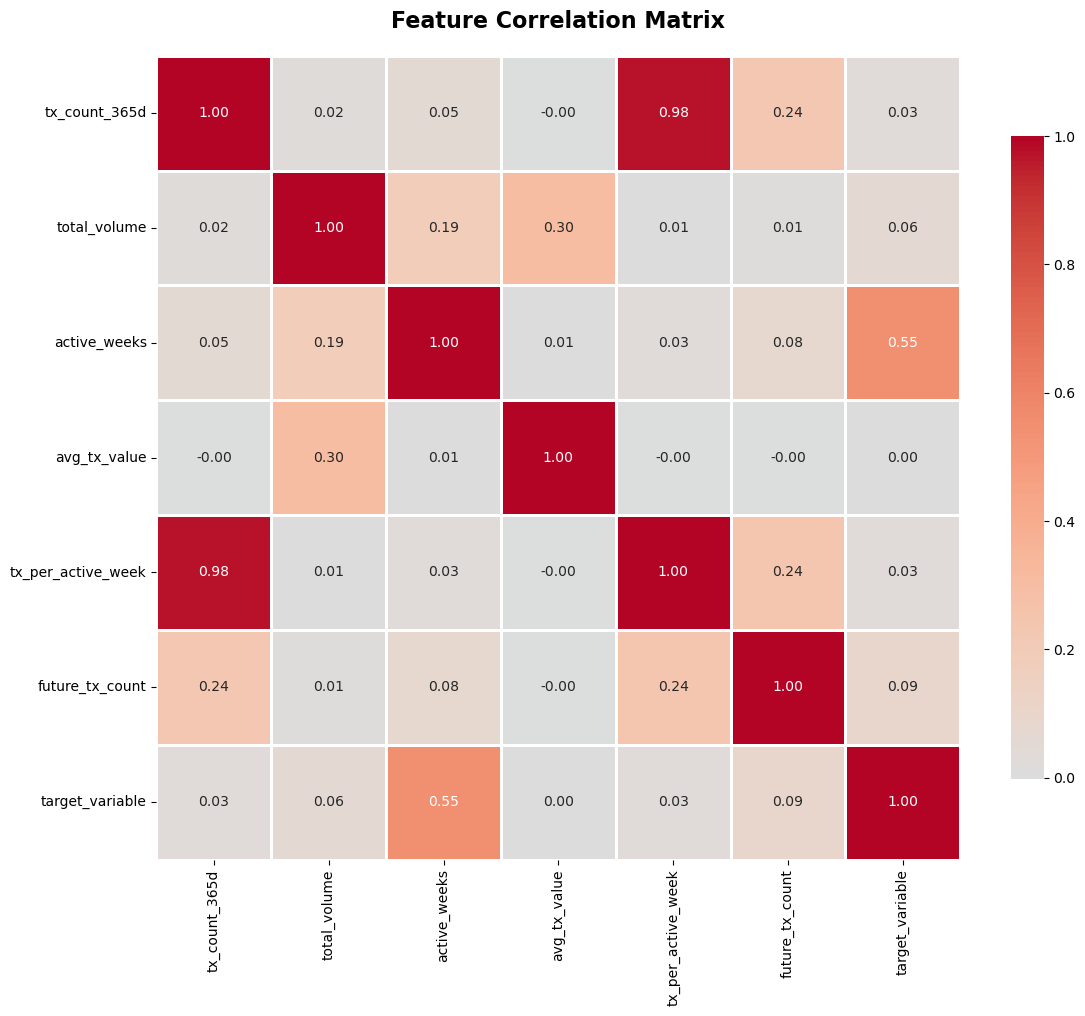


CORRELATION WITH TARGET VARIABLE

Features sorted by correlation with target_variable:
  active_weeks                  : 0.5487
  future_tx_count               : 0.0925
  total_volume                  : 0.0603
  tx_count_365d                 : 0.0294
  tx_per_active_week            : 0.0275
  avg_tx_value                  : 0.0028


In [171]:
# Correlation heatmap
numerical_for_corr = numerical_features + ['target_variable']
correlation_matrix = df[numerical_for_corr].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Show correlation with target
print("\n" + "=" * 80)
print("CORRELATION WITH TARGET VARIABLE")
print("=" * 80)
target_corr = correlation_matrix['target_variable'].drop('target_variable').sort_values(ascending=False)
print("\nFeatures sorted by correlation with target_variable:")
for feature, corr_value in target_corr.items():
    print(f"  {feature:30s}: {corr_value:6.4f}")

## 5. Correlation Analysis

In [172]:
numerical_features = ['tx_count_365d', 'total_volume', 'active_weeks', 'avg_tx_value', 'tx_per_active_week', 'future_tx_count']

# Statistical comparison between Good and Bad traders
print("=" * 80)
print("FEATURE COMPARISON: GOOD TRADERS vs BAD TRADERS")
print("=" * 80)

comparison_data = []
for feature in numerical_features:
    bad_mean = df[df['target_variable'] == 0][feature].mean()
    good_mean = df[df['target_variable'] == 1][feature].mean()
    bad_median = df[df['target_variable'] == 0][feature].median()
    good_median = df[df['target_variable'] == 1][feature].median()
    
    comparison_data.append({
        'Feature': feature,
        'Bad Trader Mean': f'{bad_mean:.4f}',
        'Good Trader Mean': f'{good_mean:.4f}',
        'Bad Trader Median': f'{bad_median:.4f}',
        'Good Trader Median': f'{good_median:.4f}'
    })

comparison_df = pd.DataFrame(comparison_data)
print("\n", comparison_df.to_string(index=False))

FEATURE COMPARISON: GOOD TRADERS vs BAD TRADERS

            Feature Bad Trader Mean Good Trader Mean Bad Trader Median Good Trader Median
     tx_count_365d          9.7216         277.0896            2.0000            36.0000
      total_volume        563.2981       26652.3398            0.0050           159.6973
      active_weeks          1.5168          11.5792            1.0000             8.0000
      avg_tx_value        133.9212         145.7117            0.0020             4.3285
tx_per_active_week          3.5749          17.8229            1.5000             4.0442
   future_tx_count          0.0276          87.9992            0.0000            19.0000


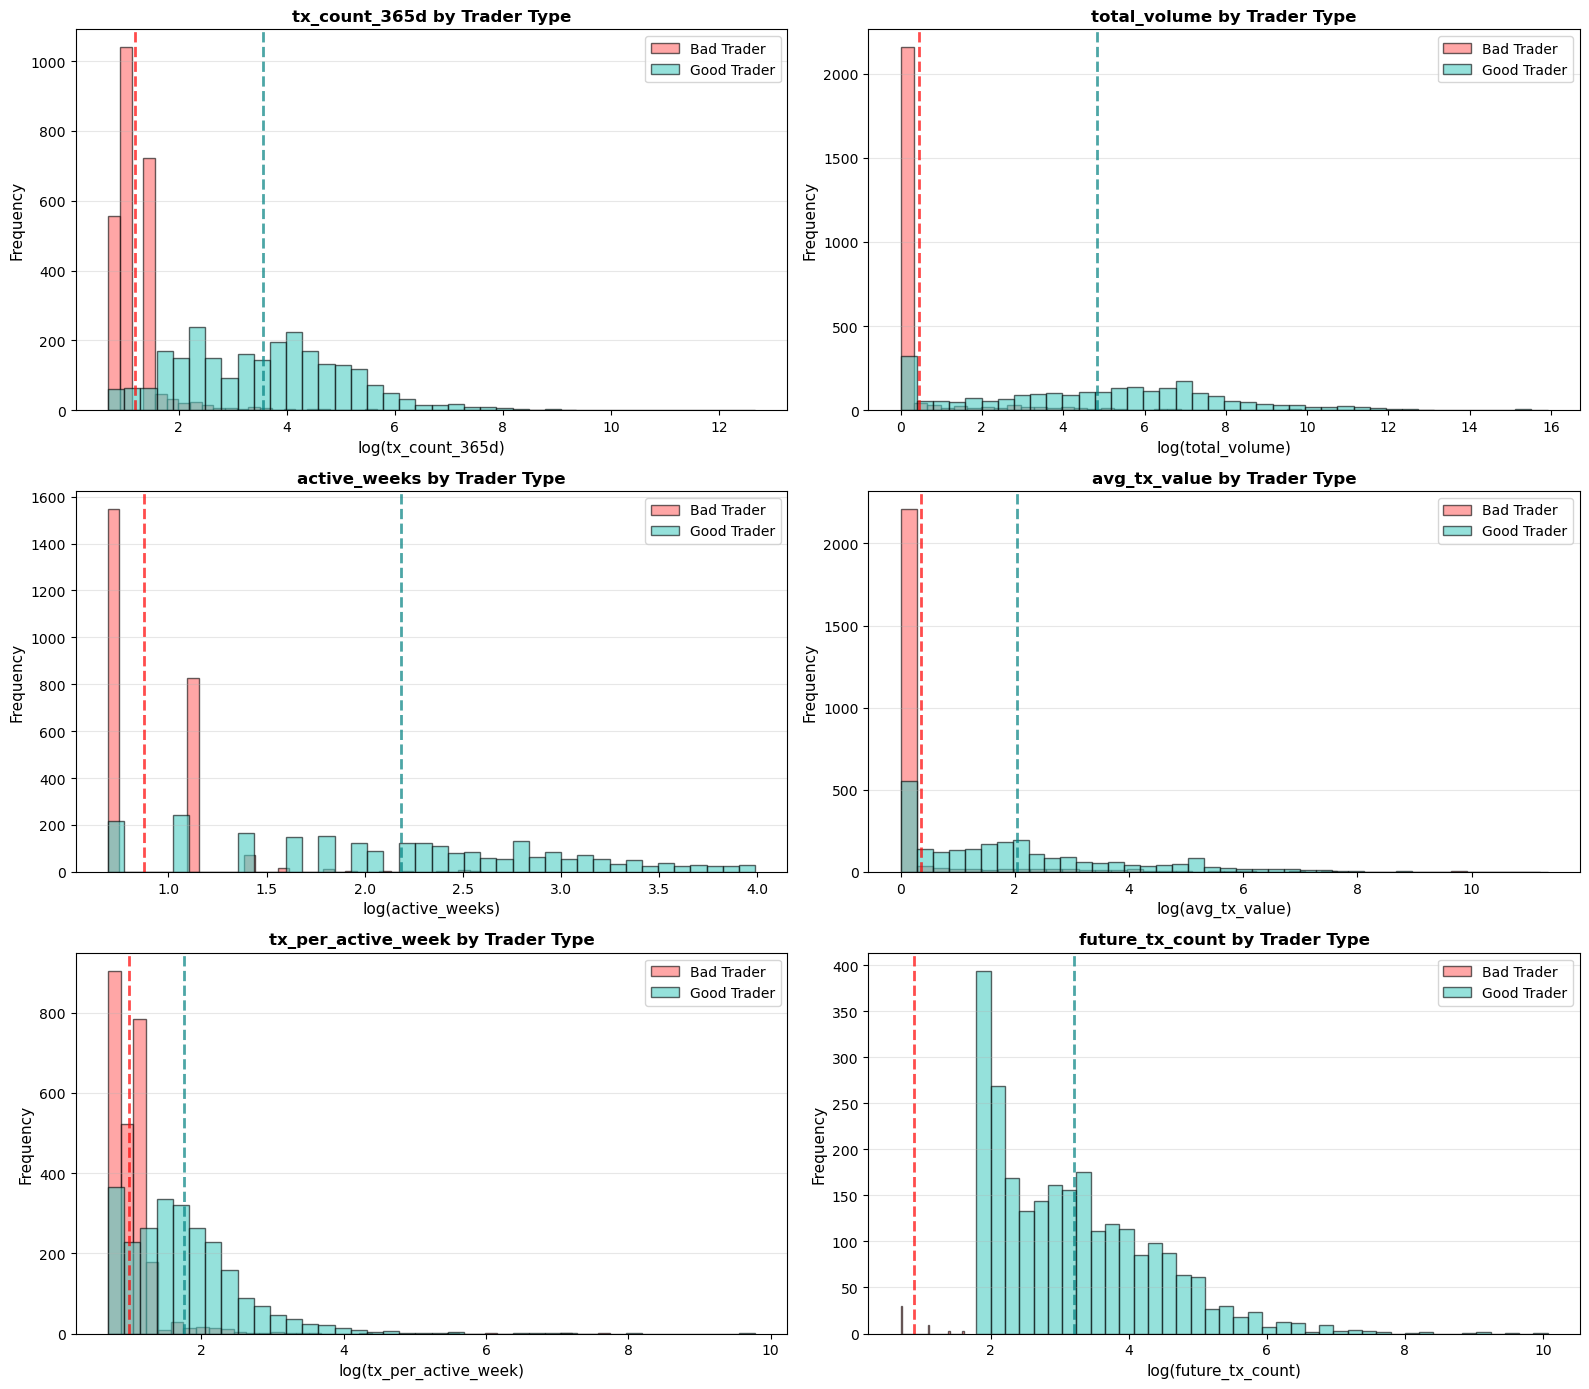

In [173]:
numerical_features = ['tx_count_365d', 'total_volume', 'active_weeks', 'avg_tx_value', 'tx_per_active_week', 'future_tx_count']

# Compare numerical features between Good and Bad traders
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
axes = axes.ravel()

for idx, feature in enumerate(numerical_features):
    # Separate data by target
    bad_traders = df[df['target_variable'] == 0][feature]
    good_traders = df[df['target_variable'] == 1][feature]
    
    # Apply log transformation for better visualization
    bad_traders_log = np.log1p(bad_traders[bad_traders > 0])
    good_traders_log = np.log1p(good_traders[good_traders > 0])
    
    # Plot overlapping histograms
    axes[idx].hist(bad_traders_log, bins=40, alpha=0.6, label='Bad Trader', color='#FF6B6B', edgecolor='black')
    axes[idx].hist(good_traders_log, bins=40, alpha=0.6, label='Good Trader', color='#4ECDC4', edgecolor='black')
    
    axes[idx].set_xlabel(f'log({feature})', fontsize=11)
    axes[idx].set_ylabel('Frequency', fontsize=11)
    axes[idx].set_title(f'{feature} by Trader Type', fontsize=12, fontweight='bold')
    axes[idx].legend(fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add mean lines
    axes[idx].axvline(bad_traders_log.mean(), color='red', linestyle='--', linewidth=2, alpha=0.7)
    axes[idx].axvline(good_traders_log.mean(), color='teal', linestyle='--', linewidth=2, alpha=0.7)

plt.tight_layout()
plt.show()

## 4. Features by Target Variable (Good vs Bad Traders)

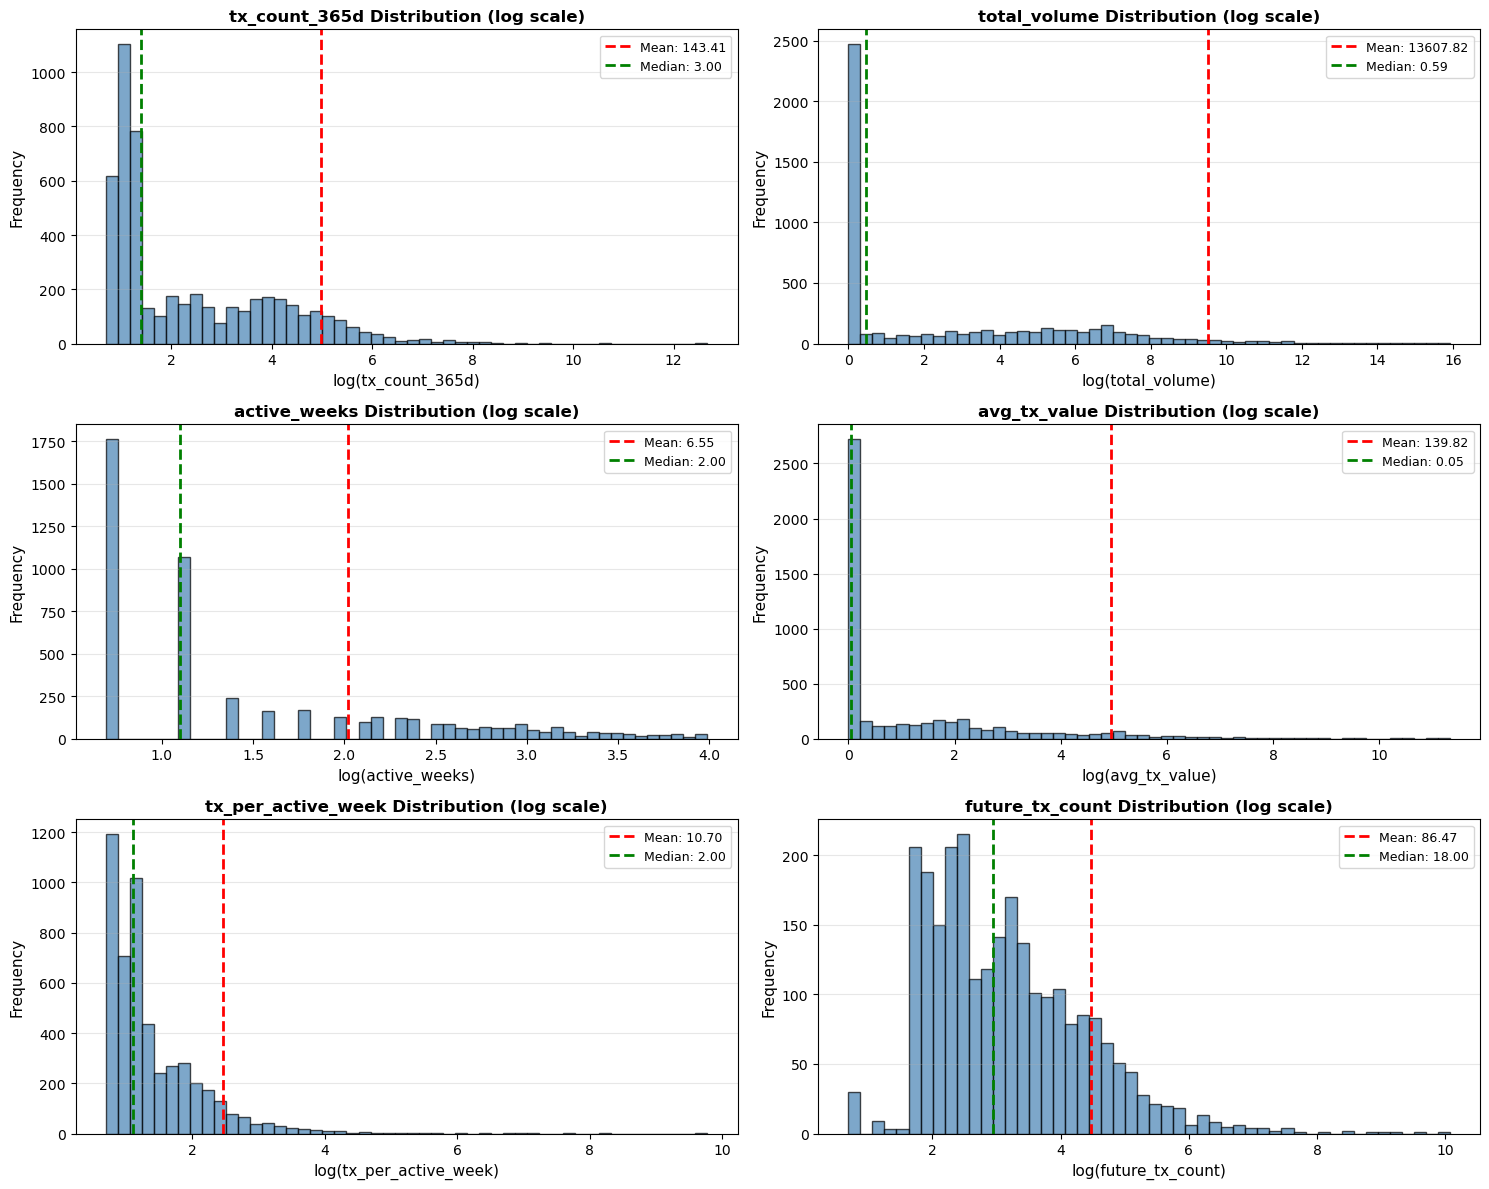

In [174]:
# Distribution of numerical features (log scale for better visualization)
numerical_features = ['tx_count_365d', 'total_volume', 'active_weeks', 'avg_tx_value', 'tx_per_active_week', 'future_tx_count']

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, feature in enumerate(numerical_features):
    # Use log scale due to high variance
    df_plot = df[df[feature] > 0].copy()  # Exclude zeros for log transformation
    df_plot[f'{feature}_log'] = np.log1p(df_plot[feature])
    
    axes[idx].hist(df_plot[f'{feature}_log'], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
    axes[idx].set_xlabel(f'log({feature})', fontsize=11)
    axes[idx].set_ylabel('Frequency', fontsize=11)
    axes[idx].set_title(f'{feature} Distribution (log scale)', fontsize=12, fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add statistics
    mean_val = df_plot[feature].mean()
    median_val = df_plot[feature].median()
    axes[idx].axvline(np.log1p(mean_val), color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(np.log1p(median_val), color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[idx].legend(fontsize=9)

plt.tight_layout()
plt.show()

## 3. Numerical Features Distribution

TARGET VARIABLE DISTRIBUTION

Class Distribution:
  Bad Traders (0): 2500 (50.0%)
  Good Traders (1): 2500 (50.0%)

Class Balance Ratio: 1.00:1 (Bad:Good)


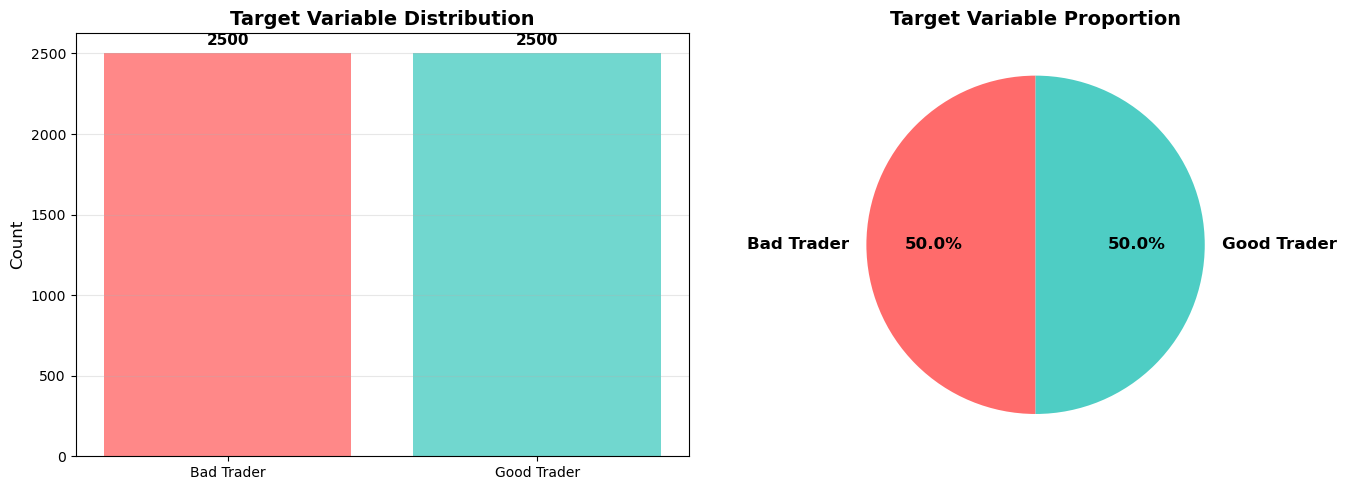

In [175]:
# Target variable distribution
print("=" * 80)
print("TARGET VARIABLE DISTRIBUTION")
print("=" * 80)
target_counts = df['target_variable'].value_counts()
target_percent = (df['target_variable'].value_counts(normalize=True) * 100).round(2)

print(f"\nClass Distribution:")
print(f"  Bad Traders (0): {target_counts[0]} ({target_percent[0]}%)")
print(f"  Good Traders (1): {target_counts[1]} ({target_percent[1]}%)")
print(f"\nClass Balance Ratio: {target_counts[0]/target_counts[1]:.2f}:1 (Bad:Good)")

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
axes[0].bar(['Bad Trader', 'Good Trader'], target_counts.values, color=['#FF6B6B', '#4ECDC4'], alpha=0.8)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Target Variable Distribution', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(target_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', fontsize=11, fontweight='bold')

# Pie chart
colors = ['#FF6B6B', '#4ECDC4']
axes[1].pie(target_counts.values, labels=['Bad Trader', 'Good Trader'], autopct='%1.1f%%',
            colors=colors, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Target Variable Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 2. Target Variable Analysis

In [176]:
# Categorical features analysis
print("\n" + "=" * 80)
print("CATEGORICAL FEATURES - VALUE COUNTS")
print("=" * 80)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
# Exclude wallet address from analysis
categorical_cols = [col for col in categorical_cols if col != 'wallet']
print(f"\nCategorical columns: {categorical_cols}\n")

for col in categorical_cols:
    print(f"\n{col}:")
    print("-" * 40)
    value_counts = df[col].value_counts()
    value_percent = (df[col].value_counts(normalize=True) * 100).round(2)
    summary = pd.DataFrame({
        'Count': value_counts,
        'Percentage': value_percent
    })
    print(summary)


CATEGORICAL FEATURES - VALUE COUNTS

Categorical columns: ['trader_activity_status', 'trader_volume_status', 'trader_consistency_status']


trader_activity_status:
----------------------------------------
                        Count  Percentage
trader_activity_status                   
Frequent User            1757       35.14
Occasional User          1719       34.38
Regular User             1524       30.48

trader_volume_status:
----------------------------------------
                      Count  Percentage
trader_volume_status                   
Medium Value           2990        59.8
Low Value              1470        29.4
High Value              540        10.8

trader_consistency_status:
----------------------------------------
                           Count  Percentage
trader_consistency_status                   
Consistent                  3238       64.76
Inconsistent                1762       35.24


In [177]:
# Statistical summary of numerical features
print("\n" + "=" * 80)
print("NUMERICAL FEATURES - STATISTICAL SUMMARY")
print("=" * 80)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumerical columns: {numerical_cols}\n")
print(df[numerical_cols].describe().round(4))


NUMERICAL FEATURES - STATISTICAL SUMMARY

Numerical columns: ['tx_count_365d', 'total_volume', 'active_weeks', 'avg_tx_value', 'tx_per_active_week', 'future_tx_count', 'target_variable']

       tx_count_365d  total_volume  active_weeks  avg_tx_value  \
count      5000.0000  5.000000e+03     5000.0000     5000.0000   
mean        143.4056  1.360782e+04        6.5480      139.8165   
std        4553.8596  2.163601e+05        9.1709     2095.5596   
min           1.0000  0.000000e+00        1.0000        0.0000   
25%           2.0000  4.200000e-03        1.0000        0.0016   
50%           3.0000  5.934000e-01        2.0000        0.0547   
75%          37.0000  1.883280e+02        9.0000        5.9342   
max      318373.0000  8.189181e+06       53.0000    83440.3625   

       tx_per_active_week  future_tx_count  target_variable  
count           5000.0000        5000.0000        5000.0000  
mean              10.6989          44.0134           0.5000  
std              259.4622     

In [178]:
# Check for missing values
print("\n" + "=" * 80)
print("MISSING VALUES CHECK")
print("=" * 80)
missing = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing Count': missing.values,
    'Missing Percentage': missing_percent.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("\n✓ No missing values found in the dataset!")
    
    


MISSING VALUES CHECK

✓ No missing values found in the dataset!


In [179]:
# Basic information about the dataset
print("=" * 80)
print("DATASET INFORMATION")
print("=" * 80)
print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nMemory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n" + "-" * 80)
print("Column Information:")
print("-" * 80)
df.info()

DATASET INFORMATION

Dataset Shape: 5000 rows × 11 columns

Memory Usage: 1.57 MB

--------------------------------------------------------------------------------
Column Information:
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   wallet                     5000 non-null   object 
 1   tx_count_365d              5000 non-null   int64  
 2   total_volume               5000 non-null   float64
 3   active_weeks               5000 non-null   int64  
 4   avg_tx_value               5000 non-null   float64
 5   tx_per_active_week         5000 non-null   float64
 6   trader_activity_status     5000 non-null   object 
 7   trader_volume_status       5000 non-null   object 
 8   trader_consistency_status  5000 non-null   object 
 9   future_

In [180]:
# FEATURE ENGINEERING (LEAKAGE-SAFE)
warnings.filterwarnings("ignore")

print("Original features:", df.shape[1] - 2)  # exclude wallet + target
print("\nStarting Feature Engineering (Leakage-Safe)...\n")

# =====================================================
# 1. LOG TRANSFORMATIONS (skewed historical features)
# =====================================================
print("1. Log transformations...")

df['log_tx_count'] = np.log1p(df['tx_count_365d'])
df['log_total_volume'] = np.log1p(df['total_volume'])
df['log_avg_tx_value'] = np.log1p(df['avg_tx_value'])
df['log_active_weeks'] = np.log1p(df['active_weeks'])

# =====================================================
# 2. RATIO & INTENSITY FEATURES
# =====================================================
print("2. Ratio & intensity features...")

df['volume_per_tx'] = df['total_volume'] / (df['tx_count_365d'] + 1)
df['volume_per_week'] = df['total_volume'] / (df['active_weeks'] + 1)
df['avg_weekly_tx'] = df['tx_count_365d'] / (df['active_weeks'] + 1)

df['activity_intensity'] = df['tx_count_365d'] / (df['active_weeks'] + 1)
df['tx_efficiency'] = df['tx_count_365d'] / (df['total_volume'] + 1)

# =====================================================
# 3. BINNING / CATEGORICAL FEATURES
# =====================================================
print("3. Binned categorical features...")

df['volume_category'] = pd.cut(
    df['total_volume'],
    bins=[0, 1, 10, 50, np.inf],
    labels=['very_low', 'low', 'medium', 'high']
).astype(str)

df['tx_frequency'] = pd.cut(
    df['tx_count_365d'],
    bins=[0, 5, 20, 50, np.inf],
    labels=['rare', 'occasional', 'frequent', 'very_frequent']
).astype(str)

df['consistency_level'] = pd.cut(
    df['active_weeks'],
    bins=[0, 4, 12, 26, np.inf],
    labels=['sporadic', 'occasional', 'regular', 'consistent']
).astype(str)

# =====================================================
# 4. BINARY INDICATORS (historical thresholds)
# =====================================================
print("4. Binary indicator features...")

tx_median = df['tx_count_365d'].median()
vol_75 = df['total_volume'].quantile(0.75)
weeks_median = df['active_weeks'].median()

df['is_high_volume'] = (df['total_volume'] > vol_75).astype(int)
df['is_frequent_trader'] = (df['tx_count_365d'] > tx_median).astype(int)
df['is_consistent'] = (df['active_weeks'] > weeks_median).astype(int)

df['is_active_trader'] = (
    (df['tx_count_365d'] > tx_median) &
    (df['active_weeks'] > weeks_median)
).astype(int)

# =====================================================
# 5. INTERACTION FEATURES (past only)
# =====================================================
print("5. Interaction features...")

df['tx_volume_interaction'] = df['log_tx_count'] * df['log_total_volume']
df['weeks_tx_interaction'] = df['active_weeks'] * df['tx_count_365d']
df['consistency_volume'] = df['active_weeks'] * df['total_volume']

# =====================================================
# 6. POLYNOMIAL FEATURES
# =====================================================
print("6. Polynomial features...")

df['tx_count_squared'] = df['tx_count_365d'] ** 2
df['total_volume_squared'] = df['total_volume'] ** 2
df['active_weeks_squared'] = df['active_weeks'] ** 2

# =====================================================
# 7. STATISTICAL / RELATIVE FEATURES
# =====================================================
print("7. Statistical features...")

df['tx_count_zscore'] = (
    (df['tx_count_365d'] - df['tx_count_365d'].mean()) /
    df['tx_count_365d'].std()
)

df['volume_zscore'] = (
    (df['total_volume'] - df['total_volume'].mean()) /
    df['total_volume'].std()
)

df['tx_count_percentile'] = df['tx_count_365d'].rank(pct=True)
df['volume_percentile'] = df['total_volume'].rank(pct=True)

# =====================================================
# 8. DOMAIN-SPECIFIC (NO FUTURE INFO)
# =====================================================
print("8. Domain-specific features...")

# Consistency across the year
df['activity_consistency'] = df['active_weeks'] / 52

# Volume volatility proxy
df['volume_volatility'] = (
    df['total_volume'] /
    (df['avg_tx_value'] * df['tx_count_365d'] + 1)
)

# Low engagement risk (historical)
df['low_activity_risk'] = (
    (df['tx_count_365d'] < 5) &
    (df['total_volume'] < 1)
).astype(int)

# =====================================================
# FINAL SUMMARY
# =====================================================
print("\n" + "="*60)
print("FEATURE ENGINEERING COMPLETE (LEAKAGE-SAFE)")
print("="*60)

print(f"Total features (excluding wallet & target): {df.shape[1] - 2}")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Infinite values: {np.isinf(df.select_dtypes(include=[np.number])).sum().sum()}")

df.to_csv("trader_data_engineered_safe.csv", index=False)
print("\nSaved as 'trader_data_engineered_safe.csv'")


Original features: 9

Starting Feature Engineering (Leakage-Safe)...

1. Log transformations...
2. Ratio & intensity features...
3. Binned categorical features...
4. Binary indicator features...
5. Interaction features...
6. Polynomial features...
7. Statistical features...
8. Domain-specific features...

FEATURE ENGINEERING COMPLETE (LEAKAGE-SAFE)
Total features (excluding wallet & target): 38
Missing values: 0
Infinite values: 0

Saved as 'trader_data_engineered_safe.csv'


In [181]:
df.target_variable.value_counts()

target_variable
0    2500
1    2500
Name: count, dtype: int64

# Split data into training and test 

In [182]:
# =============================
# 1. Drop leakage & ID columns
# =============================
df = df.drop(columns=['wallet', 'future_tx_count'])

# =============================
# 2. Split into train/test
# =============================
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1, stratify=df['target_variable'])

# =============================
# 3. Split train into train/val
# =============================
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1, stratify=df_full_train['target_variable'])

# =============================
# 4. Reset indices
# =============================
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


#5. get target variable
y_train = df_train.target_variable.values
y_val = df_val.target_variable.values
y_test = df_test.target_variable.values

# =============================
# . Remove target_variable from features
# =============================

del df_train['target_variable']
del df_val['target_variable']
del df_test['target_variable']

# =============================
# 6. Check lengths
# =============================
len(df_train), len(df_val), len(df_test)


(3000, 1000, 1000)

In [183]:
categorical_cols = [
    'trader_activity_status',
    'trader_volume_status',
    'trader_consistency_status',
    'volume_category',
    'tx_frequency',
    'consistency_level'
]

numeric_cols = [
    'tx_count_365d',
    'total_volume',
    'active_weeks',
    'avg_tx_value',
    'tx_per_active_week',

    # Log-transformed (distribution-stabilized)
    'log_tx_count',
    'log_total_volume',
    'log_avg_tx_value',
    'log_active_weeks',

    # Ratio / efficiency features
    'volume_per_tx',
    'volume_per_week',
    'avg_weekly_tx',
    'activity_intensity',
    'tx_efficiency',

    # Interaction features
    'tx_volume_interaction',
    'weeks_tx_interaction',
    'consistency_volume',

    # Polynomial features
    'tx_count_squared',
    'total_volume_squared',
    'active_weeks_squared',

    # Statistical features
    'tx_count_zscore',
    'volume_zscore',
    'tx_count_percentile',
    'volume_percentile',

    # Domain & risk features
    'activity_consistency',
    'volume_volatility',

    # Binary indicators
    'is_high_volume',
    'is_frequent_trader',
    'is_consistent',
    'is_active_trader',
    'low_activity_risk'
]


In [184]:
# MUTUTAL INFORMATION CALCULATION to select top features

def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.target_variable)

mi_scores = (
    df_full_train[categorical_cols]
    .apply(mutual_info_churn_score)
    .sort_values(ascending=False)
)

mi_scores


tx_frequency                 0.400434
trader_activity_status       0.352827
volume_category              0.327320
consistency_level            0.307076
trader_consistency_status    0.173546
trader_volume_status         0.163213
dtype: float64

In [185]:
# dv = DictVectorizer(sparse=False)

# train_dicts = df_train[categorical_cols + numeric_cols].to_dict(orient='records')
# x_train = dv.fit_transform(train_dicts)
# val_dicts = df_val[categorical_cols + numeric_cols].to_dict(orient='records')
# x_val = dv.transform(val_dicts)

# # Train the model
# model = LogisticRegression(solver='liblinear', random_state=1)
# model.fit(x_train, y_train)
# y_pred = model.predict_proba(x_val)[:, 1]
# y_pred_binary = (y_pred >= 0.5).astype(int)
# # Evaluate the model
# (y_val == y_pred_binary).mean()

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Define transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Build pipeline
clf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', random_state=1))
])

# Fit the model
clf.fit(df_train, y_train)

# Predict
y_pred = clf.predict(df_val)
(y_val == y_pred).mean()


0.928

In [186]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

y_pred_proba = model.predict_proba(x_val_final)[:, 1]
print("ROC AUC:", roc_auc_score(y_val, y_pred_proba))
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

coefs = pd.Series(model.coef_[0], index = numeric_cols + list(dv.get_feature_names_out()))
coefs.sort_values(ascending=False)


ROC AUC: 0.97072
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       500
           1       0.92      0.94      0.93       500

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000

[[459  41]
 [ 31 469]]


ValueError: Length of values (51) does not match length of index (82)

In [200]:
# Transform test set
x_test_num = scaler.transform(df_test[numeric_cols])
x_test_cat = dv.transform(df_test[categorical_cols].to_dict(orient='records'))
x_test_final = np.hstack([x_test_num, x_test_cat])

# Get test labels
y_test_labels = y_test  # already defined

# Predict
y_test_pred = model.predict(x_test_final)
y_test_pred_proba = model.predict_proba(x_test_final)[:, 1]

# Evaluate
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

print("Test Accuracy:", accuracy_score(y_test_labels, y_test_pred))
print("Test ROC AUC:", roc_auc_score(y_test_labels, y_test_pred_proba))
print(classification_report(y_test_labels, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_labels, y_test_pred))


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- active_weeks_squared
- activity_consistency
- consistency_volume
- is_active_trader
- is_consistent
- ...


In [188]:
# Decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Transform features using DictVectorizer
dv = DictVectorizer(sparse=False)
train_dicts = df_train[categorical_cols + numeric_cols].to_dict(orient='records')
x_train = dv.fit_transform(train_dicts)
val_dicts = df_val[categorical_cols + numeric_cols].to_dict(orient='records')
x_val = dv.transform(val_dicts)
test_dicts = df_test[categorical_cols + numeric_cols].to_dict(orient='records')
x_test = dv.transform(test_dicts)

# Train Decision Tree
dt_model = DecisionTreeClassifier(max_depth=6, random_state=1)  # adjust max_depth as needed
dt_model.fit(x_train, y_train)

# Predict
y_val_pred = dt_model.predict(x_val)
y_val_proba = dt_model.predict_proba(x_val)[:, 1]
y_test_pred = dt_model.predict(x_test)
y_test_proba = dt_model.predict_proba(x_test)[:, 1]

# Evaluate
print("Decision Tree - Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Decision Tree - Validation ROC AUC:", roc_auc_score(y_val, y_val_proba))
print("\nDecision Tree - Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Decision Tree - Test ROC AUC:", roc_auc_score(y_test, y_test_proba))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))




Decision Tree - Validation Accuracy: 0.93
Decision Tree - Validation ROC AUC: 0.9578800000000001

Decision Tree - Test Accuracy: 0.914
Decision Tree - Test ROC AUC: 0.9417319999999999

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       500
           1       0.92      0.91      0.91       500

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000

Confusion Matrix:
 [[459  41]
 [ 45 455]]


In [189]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,      # number of trees
    max_depth=8,           # max depth of each tree
    random_state=1,
    n_jobs=-1              # use all cores
)
rf_model.fit(x_train, y_train)

# Predict
y_val_pred = rf_model.predict(x_val)
y_val_proba = rf_model.predict_proba(x_val)[:, 1]
y_test_pred = rf_model.predict(x_test)
y_test_proba = rf_model.predict_proba(x_test)[:, 1]

# Evaluate
print("Random Forest - Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Random Forest - Validation ROC AUC:", roc_auc_score(y_val, y_val_proba))
print("\nRandom Forest - Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Random Forest - Test ROC AUC:", roc_auc_score(y_test, y_test_proba))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Random Forest - Validation Accuracy: 0.937
Random Forest - Validation ROC AUC: 0.979712

Random Forest - Test Accuracy: 0.917
Random Forest - Test ROC AUC: 0.9770599999999999

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92       500
           1       0.90      0.94      0.92       500

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000

Confusion Matrix:
 [[449  51]
 [ 32 468]]


In [221]:

import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, precision_recall_curve

# =============================
# 1. Encode features using DictVectorizer
# =============================
dv = DictVectorizer(sparse=False)

train_dicts = df_train[categorical_cols + numeric_cols].to_dict(orient='records')
x_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical_cols + numeric_cols].to_dict(orient='records')
x_val = dv.transform(val_dicts)

test_dicts = df_test[categorical_cols + numeric_cols].to_dict(orient='records')
x_test = dv.transform(test_dicts)

# =============================
# 2. Initialize XGBoost classifier
# =============================
xgb_model = XGBClassifier(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=1,
    use_label_encoder=False,
    eval_metric='logloss'
)

# =============================
# 3. Train the model
# =============================
xgb_model.fit(x_train, y_train, eval_set=[(x_val, y_val)], verbose=False)

# =============================
# 4. Predict probabilities on validation
# =============================
y_val_pred_proba = xgb_model.predict_proba(x_val)[:, 1]

# =============================
# 5. Find optimal threshold using precision-recall
# =============================
precision, recall, thresholds = precision_recall_curve(y_val, y_val_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
best_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[best_idx]
print(f"Optimal threshold based on F1-score: {optimal_threshold:.3f}")

# =============================
# 6. Apply threshold to get predicted labels
# =============================
y_val_pred = (y_val_pred_proba >= optimal_threshold).astype(int)

print("XGBoost - Validation Accuracy:", (y_val == y_val_pred).mean())
print("XGBoost - Validation ROC AUC:", roc_auc_score(y_val, y_val_pred_proba))
print("\nClassification Report (Validation):\n", classification_report(y_val, y_val_pred))
print("Confusion Matrix (Validation):\n", confusion_matrix(y_val, y_val_pred))

# =============================
# 7. Predict on Test set using the same threshold
# =============================
y_test_pred_proba = xgb_model.predict_proba(x_test)[:, 1]
y_test_pred = (y_test_pred_proba >= optimal_threshold).astype(int)

print("\nXGBoost - Test Accuracy:", (y_test == y_test_pred).mean())
print("XGBoost - Test ROC AUC:", roc_auc_score(y_test, y_test_pred_proba))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix (Test):\n", confusion_matrix(y_test, y_test_pred))



Optimal threshold based on F1-score: 0.402
XGBoost - Validation Accuracy: 0.936
XGBoost - Validation ROC AUC: 0.97661

Classification Report (Validation):
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       500
           1       0.92      0.96      0.94       500

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000

Confusion Matrix (Validation):
 [[458  42]
 [ 22 478]]

XGBoost - Test Accuracy: 0.915
XGBoost - Test ROC AUC: 0.97584

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       500
           1       0.90      0.93      0.92       500

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.91      1000
weighted avg       0.92      0.92      0.91      1000

Confusion Matrix (Test):
 [[448  52]
 [

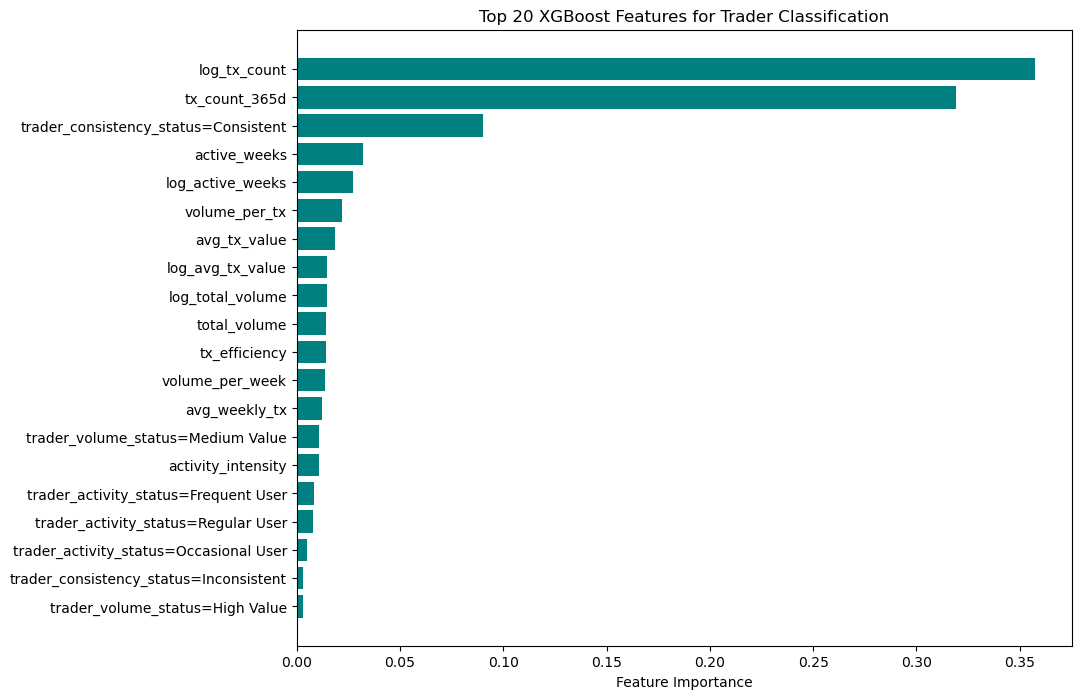

In [222]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# =============================
# 1. Get feature names
# =============================
feature_names = dv.get_feature_names_out()

# =============================
# 2. Get feature importances from XGBoost
# =============================
importances = xgb_model.feature_importances_

# =============================
# 3. Create a DataFrame for easy plotting
# =============================
feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# =============================
# 4. Plot top 20 features
# =============================
plt.figure(figsize=(10, 8))
plt.barh(feat_imp_df['feature'][:20][::-1], feat_imp_df['importance'][:20][::-1], color='teal')
plt.xlabel('Feature Importance')
plt.title('Top 20 XGBoost Features for Trader Classification')
plt.show()


In [223]:
import pickle

# Save DictVectorizer
with open('dv.pkl', 'wb') as f_out:
    pickle.dump(dv, f_out)

# Save the model (e.g., XGBoost)
with open('xgb_model.pkl', 'wb') as f_out:
    pickle.dump(xgb_model, f_out)



In [227]:
# import pandas as pd
# import numpy as np
# import pickle

# # Example: new trader data
# new_traders_df = pd.DataFrame([
#     {
#         'tx_count_365d': 10,
#         'total_volume': 50.2,
#         'active_weeks': 8,
#         'avg_tx_value': 5.02,
#         'trader_activity_status': 'Regular User',
#         'trader_volume_status': 'Medium Value',
#         'trader_consistency_status': 'Consistent'
#     },
#     {
#         'tx_count_365d': 3,
#         'total_volume': 0.5,
#         'active_weeks': 2,
#         'avg_tx_value': 0.16,
#         'trader_activity_status': 'Occasional User',
#         'trader_volume_status': 'Low Value',
#         'trader_consistency_status': 'Inconsistent'
#     },
#     {
#         'tx_count_365d': 150,
#         'total_volume': 2000.0,
#         'active_weeks': 40,
#         'avg_tx_value': 13.33,
#         'trader_activity_status': 'Frequent User',
#         'trader_volume_status': 'High Value',
#         'trader_consistency_status': 'Consistent'
#     },
#     {
#         'tx_count_365d': 400,
#         'total_volume': 12000.0,
#         'active_weeks': 50,
#         'avg_tx_value': 30.0,
#         'trader_activity_status': 'Frequent User',
#         'trader_volume_status': 'High Value',
#         'trader_consistency_status': 'Consistent'
#     }
# ])

# # =============================
# # Step 1: Feature Engineering (same as training)
# # =============================
# new_traders_df['log_tx_count'] = np.log1p(new_traders_df['tx_count_365d'])
# new_traders_df['log_total_volume'] = np.log1p(new_traders_df['total_volume'])
# new_traders_df['log_avg_tx_value'] = np.log1p(new_traders_df['avg_tx_value'])
# new_traders_df['log_active_weeks'] = np.log1p(new_traders_df['active_weeks'])

# # Ratios
# new_traders_df['volume_per_tx'] = new_traders_df['total_volume'] / (new_traders_df['tx_count_365d'] + 1)
# new_traders_df['volume_per_week'] = new_traders_df['total_volume'] / (new_traders_df['active_weeks'] + 1)
# new_traders_df['avg_weekly_tx'] = new_traders_df['tx_count_365d'] / (new_traders_df['active_weeks'] + 1)
# new_traders_df['activity_intensity'] = new_traders_df['tx_count_365d'] / (new_traders_df['active_weeks'] + 1)
# new_traders_df['tx_efficiency'] = new_traders_df['tx_count_365d'] / (new_traders_df['total_volume'] + 1)

# # Interaction
# new_traders_df['tx_volume_interaction'] = new_traders_df['log_tx_count'] * new_traders_df['log_total_volume']
# new_traders_df['weeks_tx_interaction'] = new_traders_df['active_weeks'] * new_traders_df['tx_count_365d']
# new_traders_df['consistency_volume'] = new_traders_df['active_weeks'] * new_traders_df['total_volume']

# # Polynomial
# new_traders_df['tx_count_squared'] = new_traders_df['tx_count_365d'] ** 2
# new_traders_df['total_volume_squared'] = new_traders_df['total_volume'] ** 2
# new_traders_df['active_weeks_squared'] = new_traders_df['active_weeks'] ** 2

# # =============================
# # Step 2: Load DictVectorizer and Model
# # =============================
# with open('dv.pkl', 'rb') as f_in:
#     dv = pickle.load(f_in)

# with open('xgb_model.pkl', 'rb') as f_in:
#     xgb_model = pickle.load(f_in)

# # =============================
# # Step 3: Transform new data
# # =============================
# features_to_use = categorical_cols + numeric_cols  # same as used in training
# new_dicts = new_traders_df[features_to_use].to_dict(orient='records')
# X_new = dv.transform(new_dicts)

# # =============================
# # Step 4: Predict
# # =============================
# new_traders_df['predicted_proba'] = xgb_model.predict_proba(X_new)[:, 1]
# new_traders_df['predicted_target'] = (new_traders_df['predicted_proba'] >= 0.5).astype(int)

# print(new_traders_df[['tx_count_365d','total_volume','active_weeks','avg_tx_value',
#                       'trader_activity_status','trader_volume_status','trader_consistency_status',
#                       'predicted_target','predicted_proba']])


import pandas as pd
import numpy as np

# Seed for reproducibility
np.random.seed(123)

# Generate 10 new low-value traders
low_value_traders = pd.DataFrame({
    'tx_count_365d': np.random.randint(0, 10, size=10),          # 0–10 transactions
    'total_volume': np.random.uniform(0.01, 50, size=10),        # tiny total volume
    'active_weeks': np.random.randint(1, 5, size=10),            # very few active weeks
    'avg_tx_value': np.random.uniform(0.01, 5, size=10),         # tiny avg tx value
    'trader_activity_status': np.random.choice(['Occasional User', 'Regular User'], size=10),
    'trader_volume_status': np.random.choice(['Low Value', 'Medium Value'], size=10),
    'trader_consistency_status': np.random.choice(['Inconsistent', 'Consistent'], size=10)
})

# Feature engineering (same as your training)
low_value_traders['log_tx_count'] = np.log1p(low_value_traders['tx_count_365d'])
low_value_traders['log_total_volume'] = np.log1p(low_value_traders['total_volume'])
low_value_traders['log_avg_tx_value'] = np.log1p(low_value_traders['avg_tx_value'])
low_value_traders['log_active_weeks'] = np.log1p(low_value_traders['active_weeks'])

low_value_traders['volume_per_tx'] = low_value_traders['total_volume'] / (low_value_traders['tx_count_365d'] + 1)
low_value_traders['volume_per_week'] = low_value_traders['total_volume'] / (low_value_traders['active_weeks'] + 1)
low_value_traders['avg_weekly_tx'] = low_value_traders['tx_count_365d'] / (low_value_traders['active_weeks'] + 1)
low_value_traders['activity_intensity'] = low_value_traders['tx_count_365d'] / (low_value_traders['active_weeks'] + 1)
low_value_traders['tx_efficiency'] = low_value_traders['tx_count_365d'] / (low_value_traders['total_volume'] + 1)

low_value_traders['tx_volume_interaction'] = low_value_traders['log_tx_count'] * low_value_traders['log_total_volume']
low_value_traders['weeks_tx_interaction'] = low_value_traders['active_weeks'] * low_value_traders['tx_count_365d']
low_value_traders['consistency_volume'] = low_value_traders['active_weeks'] * low_value_traders['total_volume']

low_value_traders['tx_count_squared'] = low_value_traders['tx_count_365d'] ** 2
low_value_traders['total_volume_squared'] = low_value_traders['total_volume'] ** 2
low_value_traders['active_weeks_squared'] = low_value_traders['active_weeks'] ** 2

# Transform and predict using existing DictVectorizer and XGBoost model
features_to_use = categorical_cols + numeric_cols
low_dicts = low_value_traders[features_to_use].to_dict(orient='records')
X_low = dv.transform(low_dicts)

low_value_traders['predicted_proba'] = xgb_model.predict_proba(X_low)[:, 1]
low_value_traders['predicted_target'] = (low_value_traders['predicted_proba'] >= 0.402).astype(int)

# Show results
print(low_value_traders[['tx_count_365d','total_volume','active_weeks','avg_tx_value',
                         'trader_activity_status','trader_volume_status','trader_consistency_status',
                         'predicted_target','predicted_proba']])


   tx_count_365d  total_volume  active_weeks  avg_tx_value  \
0              2     24.051786             4      3.059007   
1              2     19.611955             3      3.614992   
2              6     17.165469             1      1.621565   
3              1     36.455195             4      1.815325   
4              3     21.934227             1      1.149034   
5              9      2.993298             2      1.475633   
6              6     19.908232             1      3.158571   
7              1     36.902390             4      0.469604   
8              0      9.132762             2      2.174169   
9              1      8.780833             4      2.160005   

  trader_activity_status trader_volume_status trader_consistency_status  \
0        Occasional User            Low Value              Inconsistent   
1        Occasional User            Low Value                Consistent   
2           Regular User            Low Value                Consistent   
3        Occasion

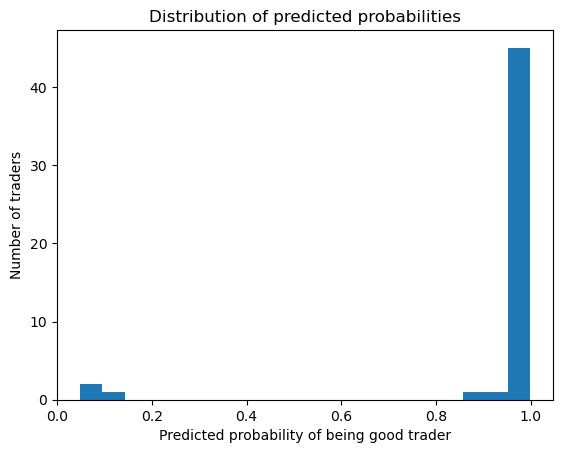

In [225]:
import matplotlib.pyplot as plt

plt.hist(df_result['predicted_proba'], bins=20)
plt.xlabel('Predicted probability of being good trader')
plt.ylabel('Number of traders')
plt.title('Distribution of predicted probabilities')
plt.show()
